In [66]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Introduction
We're going to use the dataset on [Kaggle](https://www.kaggle.com/datasets/federalreserve/interest-rates). It contains interest rate data since 1954. The federal funds rate is the interest rate at which banks trade federal funds overnight. The Fed sets a **target** for this, but due to the free market, the **effective** funds rate will be different. Since we're predicting the Fed's decision, we're going to predict the target rate.

According to the dataset description:
> The unemployment rate represents the number of unemployed as a seasonally adjusted percentage of the labor force. The inflation rate reflects the monthly change in the Consumer Price Index of products excluding food and energy.

In [67]:
df = pd.read_csv('index.csv', parse_dates={'Date': ['Year', 'Month', 'Day']}, index_col='Date')

# Data Analysis
## Data Imputation
First, let's see how many missing values we have.

In [68]:
df.isnull().sum()

Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

### Federal Funds Upper/Lower Target
It looks like there are a lot of missing values in `Federal Funds Upper Target` and `Federal Funds Lower Target`. Since this range system was only adopted more recently, we can simply convert them back to single values by calculating their average. Also, there are way too many missing values in `Real GDP (Percent Change)` so we're just going to drop it.

In [69]:
df.loc[df['Federal Funds Target Rate'].isna(), 'Federal Funds Target Rate'] = (df['Federal Funds Upper Target'] + df['Federal Funds Lower Target']) / 2
df = df.drop(['Federal Funds Upper Target', 'Federal Funds Lower Target', 'Real GDP (Percent Change)'], axis=1)
print(df.head())

            Federal Funds Target Rate  Effective Federal Funds Rate  \
Date                                                                  
1954-07-01                        NaN                          0.80   
1954-08-01                        NaN                          1.22   
1954-09-01                        NaN                          1.06   
1954-10-01                        NaN                          0.85   
1954-11-01                        NaN                          0.83   

            Unemployment Rate  Inflation Rate  
Date                                           
1954-07-01                5.8             NaN  
1954-08-01                6.0             NaN  
1954-09-01                6.1             NaN  
1954-10-01                5.7             NaN  
1954-11-01                5.3             NaN  


### Federal Funds Target Rate, Unemployment Rate, Inflation Rate
Now, let's graph the number of missing `Federal Funds Target Rate`, `Unemployment Rate`, and `Inflation Rate` values by year.

/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

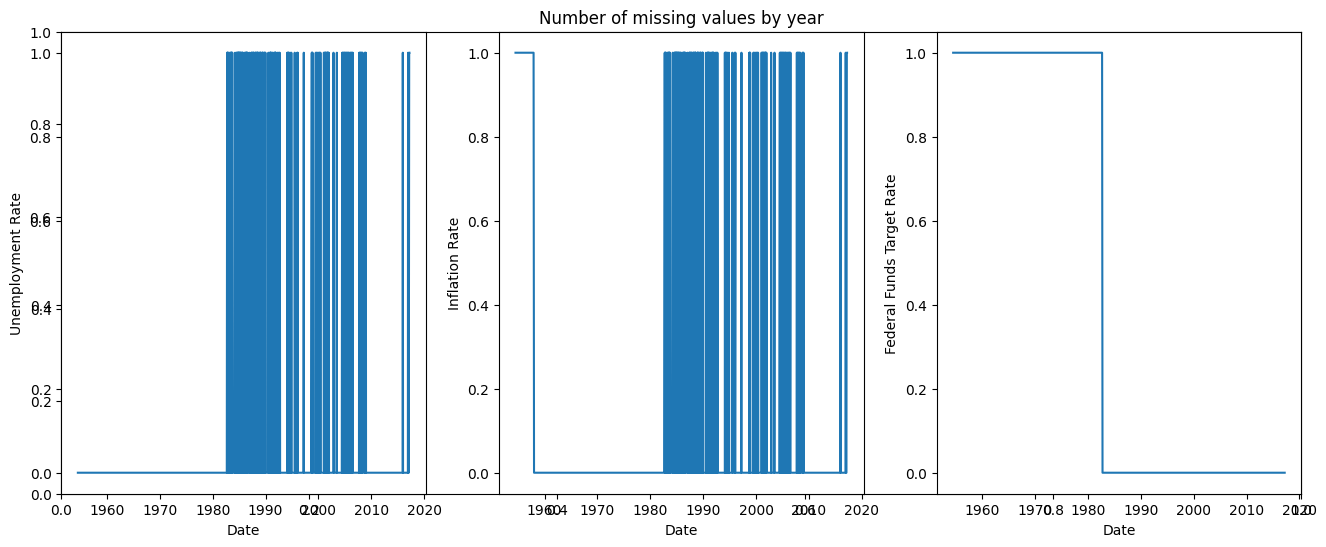

In [83]:
plt.figure(figsize=(16, 6))
plt.title('Number of missing values by year')
# plot 3 graphs separately
plt.subplot(1, 3, 1)
sns.lineplot(data=df['Unemployment Rate'].isnull())
plt.subplot(1, 3, 2)
sns.lineplot(data=df['Inflation Rate'].isnull())
plt.subplot(1, 3, 3)
sns.lineplot(data=df['Federal Funds Target Rate'].isnull())

plt.show()


It seems that the missing values for `Inflation Rate` and `Unemployment Rate` are very erratic, so we'll probably just impute them later. 
### Effective Federal Funds Rate
However, for `Federal Funds Target Rate`, we can see that the missing values are mostly in the 1950s to the 1970s. Let's see if the years with missing values in `Federal Funds Target Rate` also have missing values in `Effective Federal Funds Rate`.

/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/newwares/miniconda3/envs/tf/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: title={'center': 'Number of missing values by year'}, xlabel='Date', ylabel='Federal Funds Target Rate'>

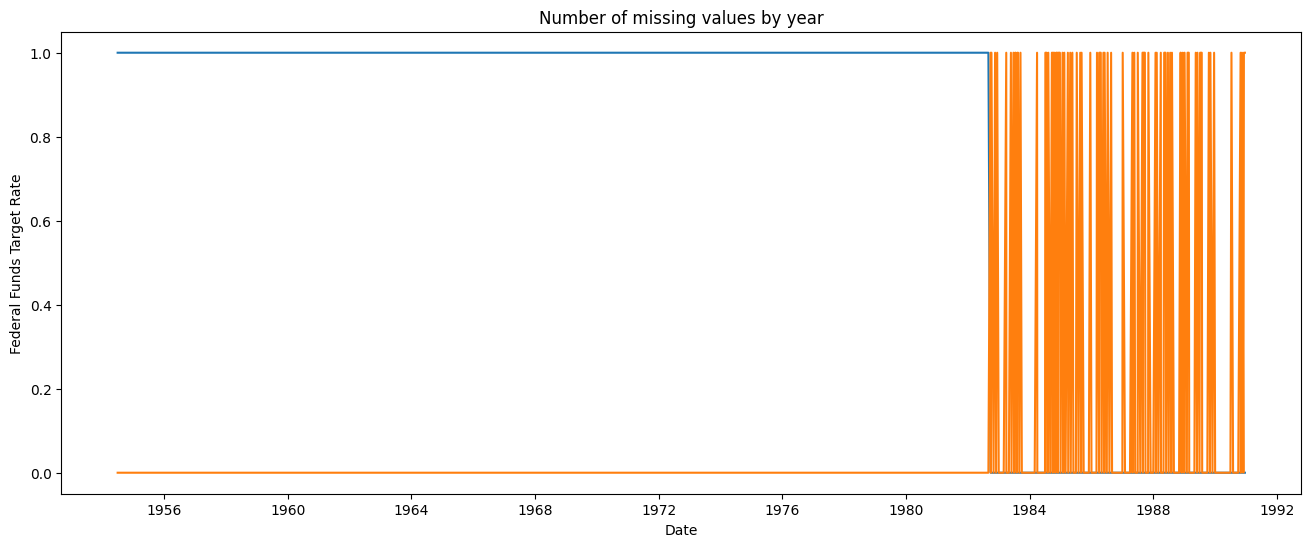

In [86]:
plt.figure(figsize=(16, 6))
plt.title('Number of missing values by year')
sns.lineplot(data=df.loc['1950':'1990', 'Federal Funds Target Rate'].isnull())
sns.lineplot(data=df.loc['1950':'1990', 'Effective Federal Funds Rate'].isnull())


In [87]:
print(df.loc[df['Federal Funds Target Rate'].isna(), 'Effective Federal Funds Rate'].notna().sum() / df['Federal Funds Target Rate'].isna().sum())

1.0


That confirms it! It looks like values in `Effective Federal Funds Rate` are always present if the values from `Federal Funds Target Rate` are missing. Therefore, we can just impute the missing values in `Federal Funds Target Rate` with the values in `Effective Federal Funds Rate`.

In [89]:
df.loc[df['Federal Funds Target Rate'].isna(), 'Federal Funds Target Rate'] = df.loc[df['Federal Funds Target Rate'].isna(), 'Effective Federal Funds Rate']
print(df.isnull().sum())

Federal Funds Target Rate         0
Effective Federal Funds Rate    152
Unemployment Rate               152
Inflation Rate                  194
dtype: int64


Let's also check if the inverse is true: if the values in `Federal Funds Target Rate` are always present if the values from `Effective Federal Funds Rate` are missing.

In [90]:
print(df.loc[df['Effective Federal Funds Rate'].isna(), 'Federal Funds Target Rate'].notna().sum() / df['Effective Federal Funds Rate'].isna().sum())

1.0


Great! So we can impute both ways then. Let's impute the missing values in `Effective Federal Funds Rate` with the values in `Federal Funds Target Rate`.

In [92]:
df.loc[df['Effective Federal Funds Rate'].isna(), 'Effective Federal Funds Rate'] = df.loc[df['Effective Federal Funds Rate'].isna(), 'Federal Funds Target Rate']
print(df.isnull().sum())

Federal Funds Target Rate         0
Effective Federal Funds Rate      0
Unemployment Rate               152
Inflation Rate                  194
dtype: int64


All that's left is to impute the missing values in `Inflation Rate` and `Unemployment Rate`. We can't derive these values from the existing data, so we'll just use the mean of the previous and next values.

In [93]:
df['Inflation Rate'] = df['Inflation Rate'].interpolate()
df['Unemployment Rate'] = df['Unemployment Rate'].interpolate()
print(df.isnull().sum())

Federal Funds Target Rate        0
Effective Federal Funds Rate     0
Unemployment Rate                0
Inflation Rate                  42
dtype: int64
